In [84]:
import numpy as np
import os
import pandas as pd

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt 
import seaborn as sns

#attributes/features
* buying - price of the car: vhigh, high, med, low
* maint - price of maintenance: vhigh, high, med, low
* doors - number of doors: 2, 3, 4, 5more
* persons - highest number of passengers that can be transported: 2, 4, more
* lug_boot - size of luggage compartment/boot: small, med, big
* safety - estimated safety of car: low, med, high
#label - car acceptibility:bad, acc

# Load data

In [85]:
data_dir = './data'
test_filename = 'P3_test.csv'
submission_filename = 'submission_template.csv'
training_filename = 'training_data.csv'

In [86]:
df_training = pd.read_csv(os.path.join(data_dir, training_filename))
df_training = df_training.drop(['cid'], axis=1)
df_training.head()

,buying,maint,doors,persons,lug_boot,safety,label
0,vhigh,med,2,4,med,med,bad
1,low,med,3,4,small,high,acc
2,med,med,3,more,med,high,acc
3,med,low,4,2,big,med,bad
4,low,high,4,more,big,high,acc


# Data Preprocessing

In [87]:
y = df_training['label']
x = df_training.drop(['label'], axis=1)

In [88]:
x_encoded = pd.get_dummies(x, drop_first=True)
x_encoded

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
0,False,False,True,False,True,False,False,False,False,True,False,True,False,False,True
1,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False
2,False,True,False,False,True,False,True,False,False,False,True,True,False,False,False
3,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,False,False,True,True,False,False,True,False,False,False,False,False,True,False,True
296,False,False,True,False,False,True,False,False,True,True,False,False,True,True,False
297,False,True,False,False,False,True,True,False,False,True,False,True,False,False,False
298,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False


### P2

In [89]:
x_encoded.shape, y.shape

((300, 15), (300,))

In [90]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(x_encoded, y)
print(f"# of leaf nodes: {dt.get_n_leaves()}")
print(f"Max depth: {dt.get_depth()}")

# of leaf nodes: 37
Max depth: 10


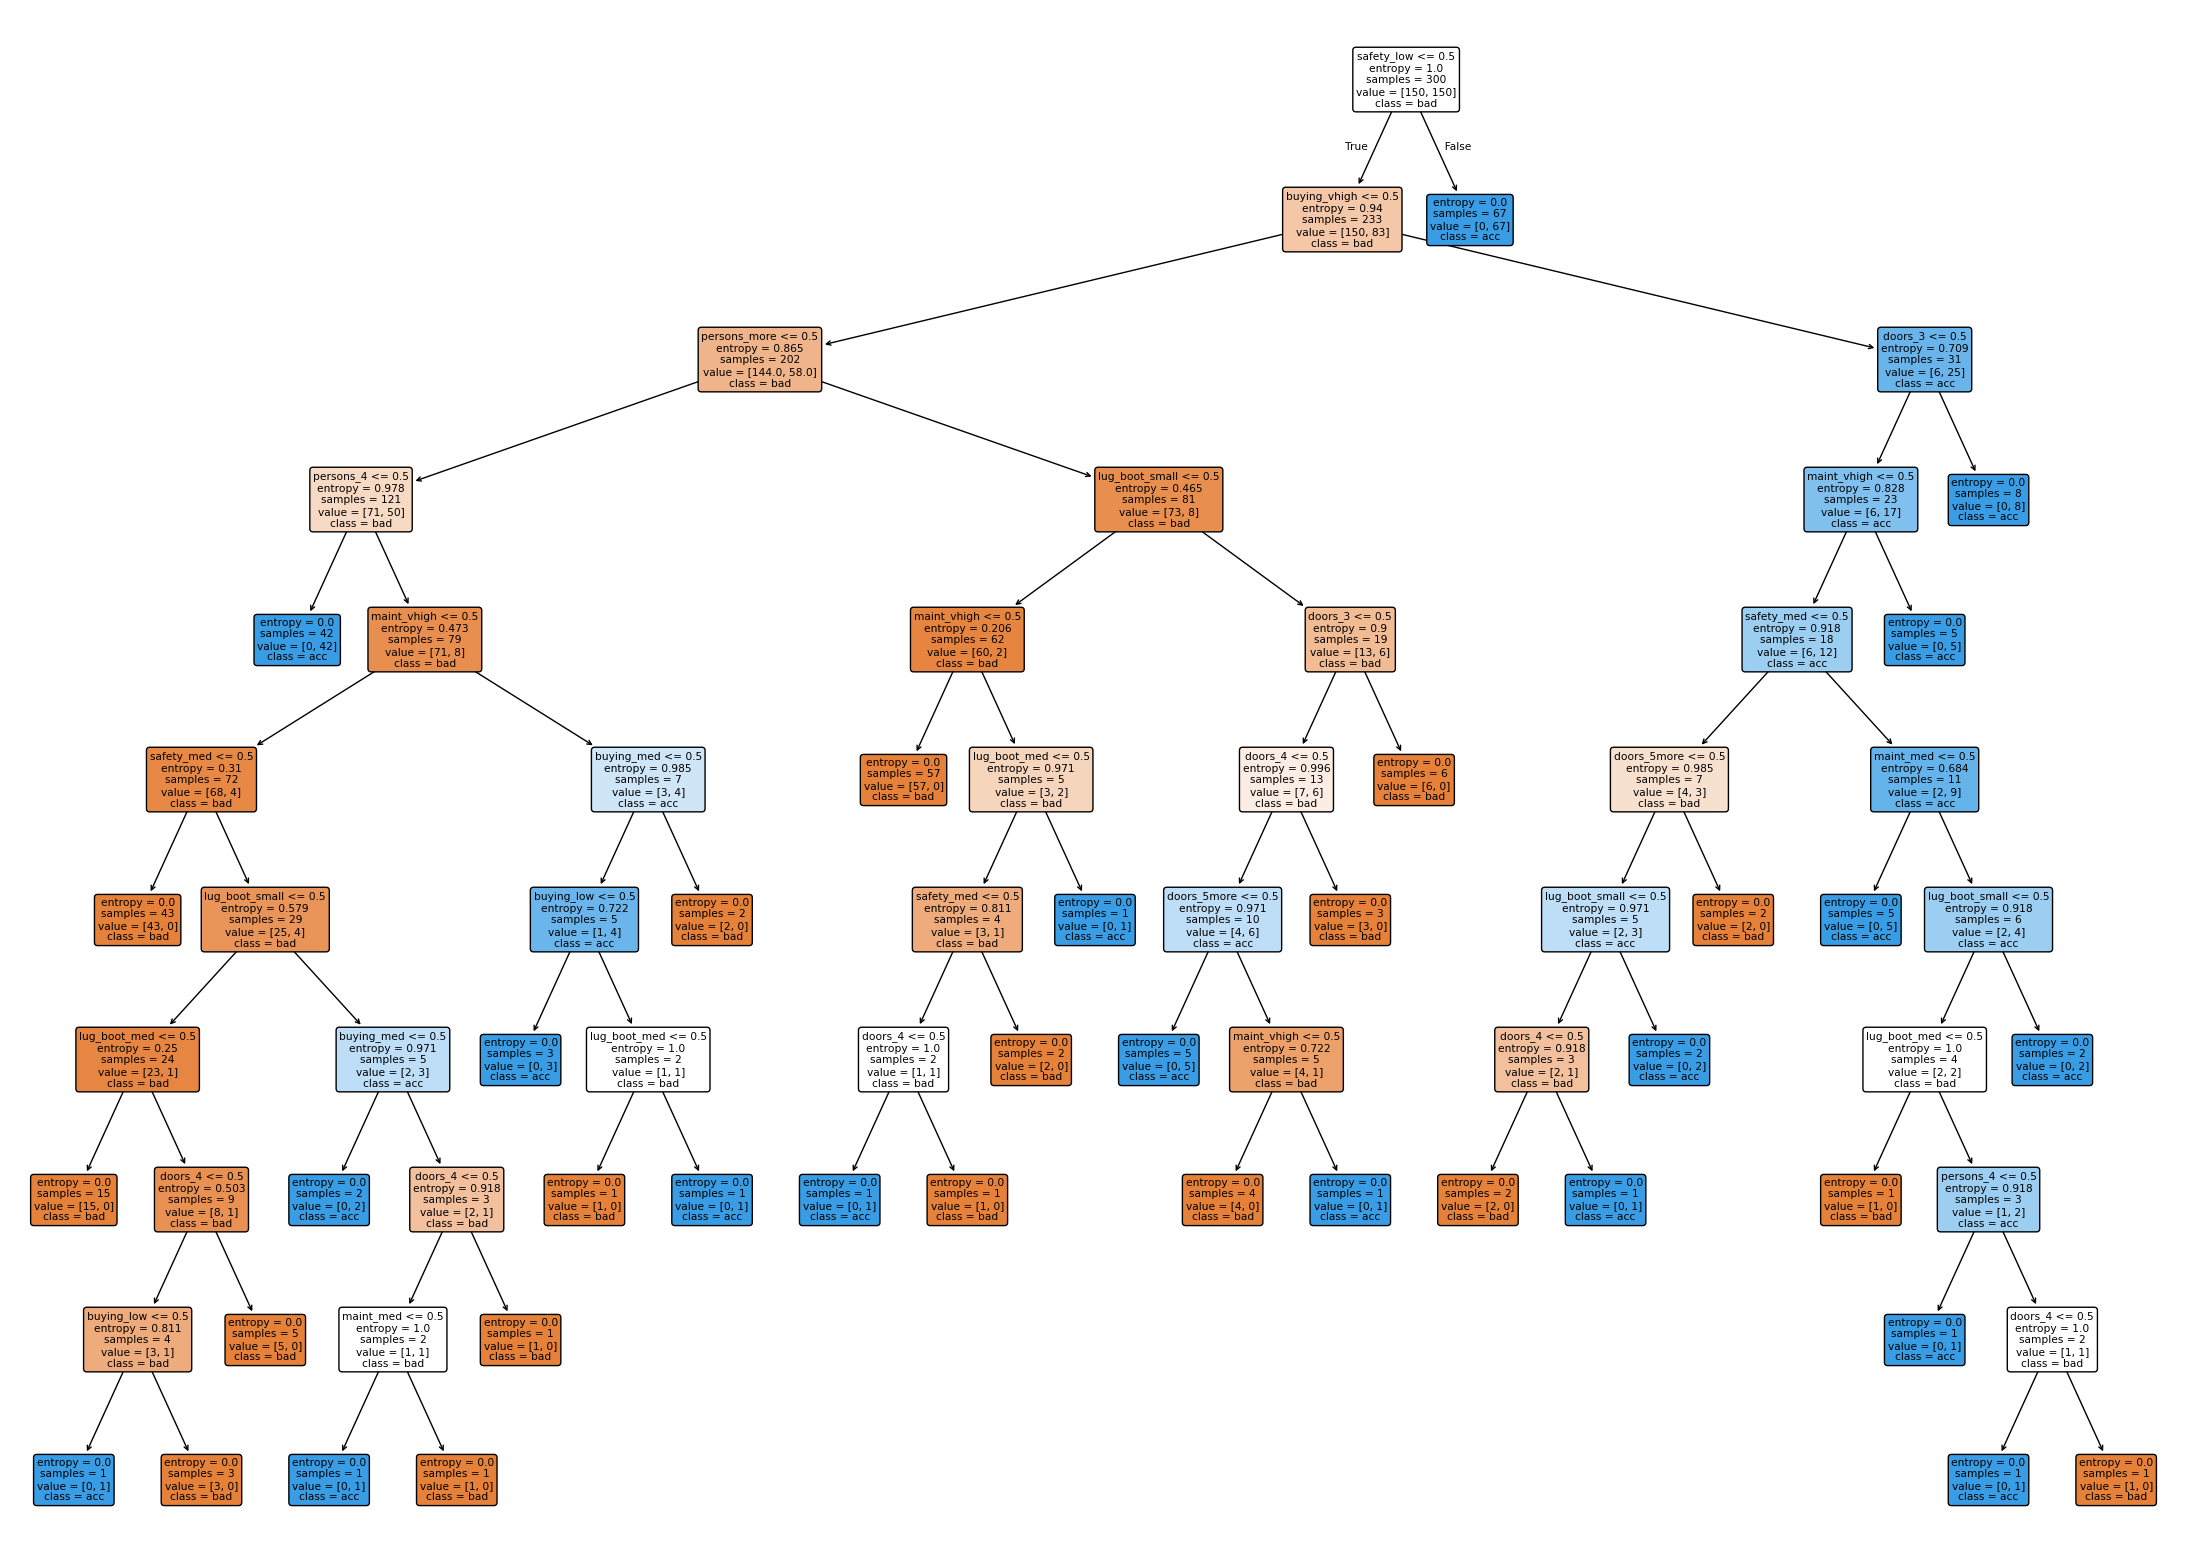

In [91]:
plt.figure(figsize=(28, 20))
tree.plot_tree(dt.fit(x_encoded, y),
               feature_names=x_encoded.columns,
               class_names=['bad', 'acc'],
               filled=True,
               rounded=True)
plt.show()

### P3

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape

((210, 15), (90, 15))

In [93]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train, y_train)
print(f"# of leaf nodes: {dt.get_n_leaves()}")
print(f"Max depth: {dt.get_depth()}")

# of leaf nodes: 28
Max depth: 9


In [94]:
dt_tree = dt.tree_

print("\nInternal Nodes:")
for i in range(dt_tree.node_count):
    if dt_tree.children_left[i] != -1:  # Internal node
        feature_name = x_encoded.columns[dt_tree.feature[i]]
        threshold = dt_tree.threshold[i]
        print(f"Node {i}: Feature = {feature_name}, Threshold = {threshold:.4f}")



Internal Nodes:
Node 0: Feature = safety_low, Threshold = 0.5000
Node 1: Feature = buying_vhigh, Threshold = 0.5000
Node 2: Feature = maint_vhigh, Threshold = 0.5000
Node 3: Feature = persons_4, Threshold = 0.5000
Node 4: Feature = persons_more, Threshold = 0.5000
Node 6: Feature = lug_boot_small, Threshold = 0.5000
Node 8: Feature = doors_3, Threshold = 0.5000
Node 9: Feature = doors_5more, Threshold = 0.5000
Node 10: Feature = doors_4, Threshold = 0.5000
Node 15: Feature = safety_med, Threshold = 0.5000
Node 17: Feature = lug_boot_small, Threshold = 0.5000
Node 18: Feature = lug_boot_med, Threshold = 0.5000
Node 20: Feature = doors_4, Threshold = 0.5000
Node 21: Feature = buying_low, Threshold = 0.5000
Node 25: Feature = buying_med, Threshold = 0.5000
Node 27: Feature = maint_med, Threshold = 0.5000
Node 28: Feature = maint_low, Threshold = 0.5000
Node 32: Feature = doors_3, Threshold = 0.5000
Node 33: Feature = buying_low, Threshold = 0.5000
Node 35: Feature = lug_boot_med, Thresho

### P4

In [95]:
y_train_pred = dt.predict(x_train)
train_acc = accuracy_score(y_train, y_train_pred)
train_error = 1 - train_acc
print(f"Training Error: {train_error:.4f}")

y_test_pred = dt.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred)
test_error = 1 - test_acc
print(f"Test Error: {test_error:.4f}")

Training Error: 0.0000
Test Error: 0.0556


### P5

In [96]:
train_errors = []
depths = range(1, 11)

for d in depths:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=42)
    clf.fit(x_train, y_train)
    y_pred_train = clf.predict(x_train)
    error = 1 - accuracy_score(y_train, y_pred_train)
    train_errors.append(error)

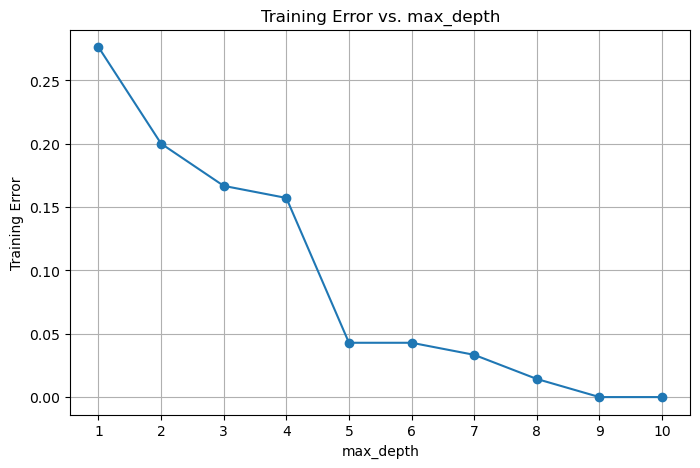

In [97]:
plt.figure(figsize=(8, 5))
plt.plot(depths, train_errors, marker='o', linestyle='-')
plt.xlabel("max_depth")
plt.ylabel("Training Error")
plt.title("Training Error vs. max_depth")
plt.grid(True)
plt.xticks(depths)
plt.show()


### P6

In [98]:
depth_range = range(1, 11)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
error_val_list = []

for d in depth_range:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=42)
    val_scores = cross_val_score(clf, x_encoded, y, cv=outer_cv, scoring='accuracy')
    error_val = 1 - val_scores.mean()
    error_val_list.append(error_val)

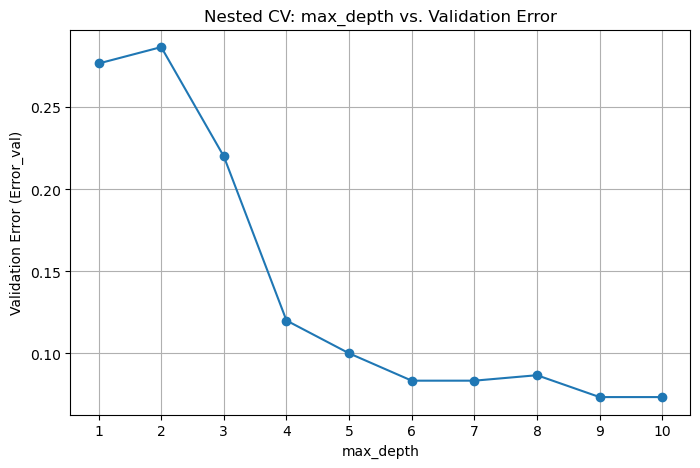

best max_depth = 9，corresponding Error_val = 0.0733


In [99]:
plt.figure(figsize=(8, 5))
plt.plot(depth_range, error_val_list, marker='o')
plt.xlabel("max_depth")
plt.ylabel("Validation Error (Error_val)")
plt.title("Nested CV: max_depth vs. Validation Error")
plt.grid(True)
plt.xticks(depth_range)
plt.show()

best_depth = depth_range[np.argmin(error_val_list)]
print(f"best max_depth = {best_depth}，corresponding Error_val = {min(error_val_list):.4f}")

### P7

In [100]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth, random_state=42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=42)

In [101]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right

In [102]:
leaf_count = sum((children_left == -1) & (children_right == -1))
print(f"(1) Leaf Nodes 總數: {leaf_count}")

(1) Leaf Nodes 總數: 29


In [103]:
y_pred_train = clf.predict(x_train)
train_error = 1 - accuracy_score(y_train, y_pred_train)
print(f"(2) Training Error: {train_error:.4f}")

(2) Training Error: 0.0000


In [104]:
y_pred_test = clf.predict(x_test)
test_error = 1 - accuracy_score(y_test, y_pred_test)
print(f"(3) Test Error: {test_error:.4f}")

(3) Test Error: 0.1000


### P8

In [105]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(x_encoded, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [106]:
print(f"(1) Max Depth: {clf.tree_.max_depth}")

n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
leaf_count = sum((children_left == -1) & (children_right == -1))
print(f"(2) Leaf Nodes 總數: {leaf_count}")


(1) Max Depth: 10
(2) Leaf Nodes 總數: 37


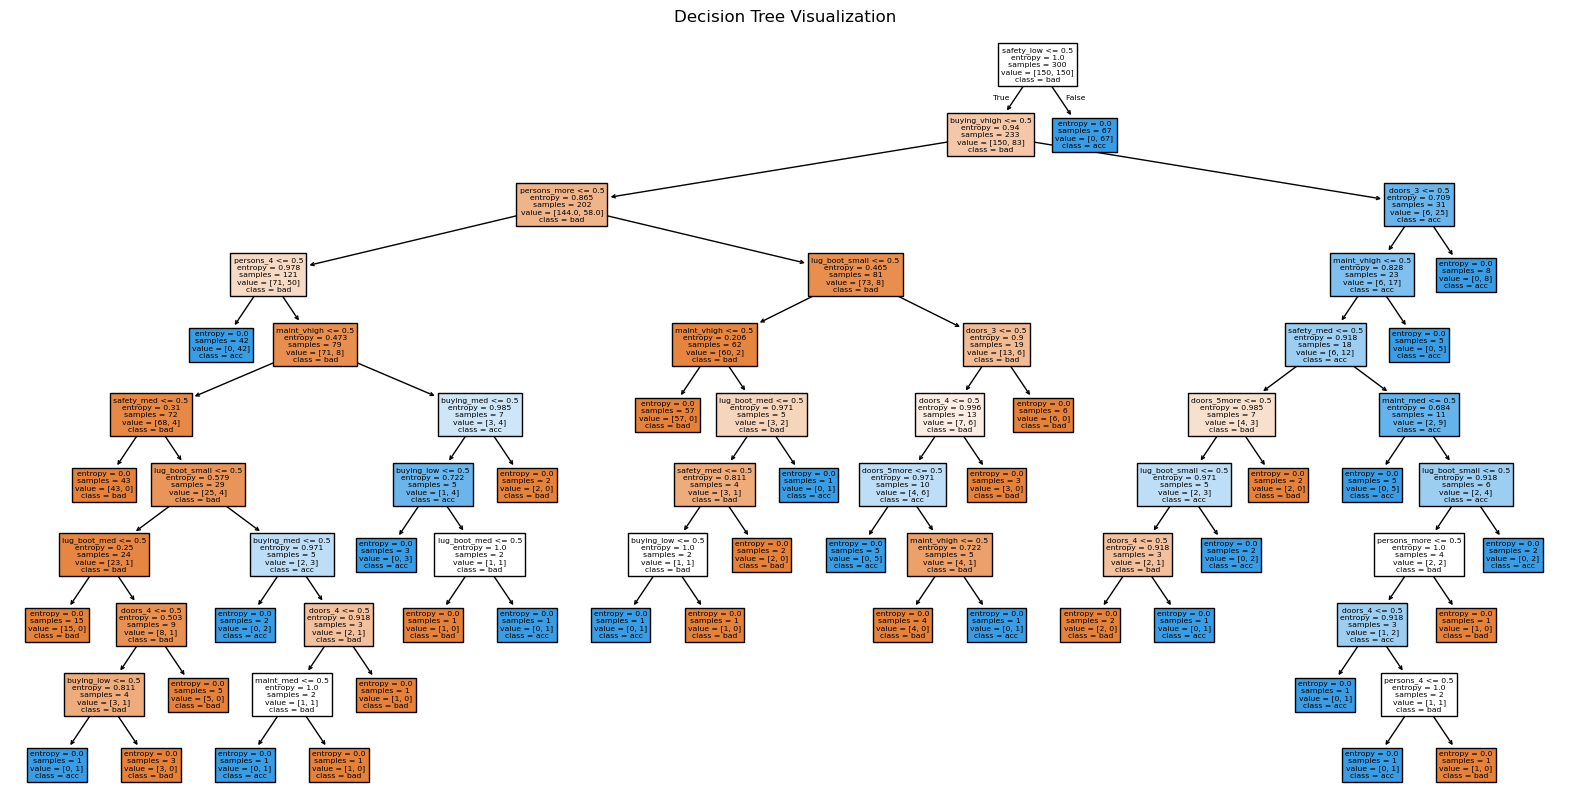

In [107]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, feature_names=x_encoded.columns, class_names=["bad", "acc"])
plt.title("Decision Tree Visualization")
plt.show()

In [108]:
df_test = pd.read_csv(os.path.join(data_dir, test_filename))
df_test = df_test.drop(columns=['cid'], axis=1)
df_test.head()

,buying,maint,doors,persons,lug_boot,safety
0,low,low,3,more,big,low
1,med,low,4,2,med,high
2,high,med,4,4,med,high
3,low,high,5more,more,med,high
4,low,med,5more,more,big,med


In [109]:
test_encoded = pd.get_dummies(df_test, drop_first=True)
test_encoded

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
0,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False
1,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False
2,False,False,False,False,True,False,False,True,False,True,False,True,False,False,False
3,True,False,False,False,False,False,False,False,True,False,True,True,False,False,False
4,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False
96,False,True,False,True,False,False,False,True,False,True,False,True,False,False,True
97,False,True,False,True,False,False,False,False,True,False,True,False,True,False,False
98,False,True,False,True,False,False,False,False,False,True,False,True,False,False,False


In [110]:
predictions = clf.predict(test_encoded)

In [111]:
submission = pd.read_csv("data/submission_template.csv")

submission['label'] = predictions

submission.to_csv("output/submission.csv", index=False)